In [4]:
%matplotlib inline

In [5]:
import pandas as pd
import numpy as np
import re
import dateparser
from collections import defaultdict
from collections import Counter

In [6]:
df = pd.read_csv("./data.csv")

In [7]:
df

,Numéro de dossier,Administration,Type,Année,Séance,Objet,Thème et sous thème,Mots clés,Sens et motivation,Partie,Avis
0,19840002,ministre de la défense,Avis,1984,03/03/1984,[Voir avis],"Justice, Ordre Public Et Sécurité/Défense Et D...",Armée,Défavorable/Défense,III,La commission d'accès aux documents administra...
1,19840003,ministre de la défense,Avis,1984,13/12/1984,[Voir avis],"Economie, Industrie, Agriculture/Secteurs Écon...",Armée,"Irrecevable/Imprécise, Défavorable/Défense, In...",III,La commission d'accès aux documents administra...
2,19850001,"ministre de l'économie, des finances et du budget",Avis,1985,05/12/1985,[Voir avis],"Justice, Ordre Public Et Sécurité/Association,...",NaN,Défavorable,III,La commission d'accès aux documents administra...
3,19860001,directeur départemental du travail et de l'emp...,Conseil,1986,30/01/1986,(voir avis),Travail Et Emploi/Droit Du Travail,"Licenciement, Conditions de travail","Défavorable/Procédure, Sans objet",III,La commission d'accès aux documents administra...
4,19870061,gouverneur de la Banque de France,Avis,1987,02/04/1987,[Voir avis],"Economie, Industrie, Agriculture/Secteurs Écon...",Banques et assurances,"Défavorable/Sécurité publique, Favorable/Sauf ...",III,La commission d'accès aux documents administra...
5,19870380,directeur de la caisse régionale d'assurance m...,Avis,1987,30/04/1987,[Voir avis],Affaires Sanitaires Et Sociales/Solidarités Et...,"Sécurité sociale, Conditions de travail",Défavorable/Secret,III,La commission d'accès aux documents administra...
6,19881774,directeur général des impôts,Avis,1988,24/11/1988,(voir avis),Finances Publiques Et Fiscalité/Contrôle Fisca...,NaN,Défavorable/Procédure,III,La commission d'accès aux documents administra...
7,19881993,ministre de l'intérieur,Avis,1988,22/12/1988,[Voir avis],"Justice, Ordre Public Et Sécurité/Sécurité Civ...",Politique et réglementation,"Défavorable/Abusive, Sans objet",III,La commission d'accès aux documents administra...
8,19890099,ministre de l'intérieur (direction de la logis...,Avis,1989,19/01/1989,"- instructions, circulaires et guides opérateu...","Justice, Ordre Public Et Sécurité/Sécurité Civ...",Politique et réglementation,Favorable,III,La commission d'accès aux documents administra...
9,19890845,ministre de la justice (direction de l'adminis...,Conseil,1989,18/05/1989,"- ""tableau de service"" du centre de détention ...","Travail Et Emploi/Emploi Public, Justice, Ordr...","Carrière, Lieux de détention",Défavorable/Sécurité publique,II,La commission d'accès aux documents administra...


In [25]:
df.Année = pd.to_numeric(df.Année)
df["Sens_reduced"] = df["Sens et motivation"].dropna().apply(lambda x: re.split("[/,]+", x)[0].strip())

In [9]:
def get_senses(text, target):
#     try:
    senses = re.split("[,]+", text)
    if target == "both_senses_motivs":
        return senses
    if senses:
        splitted = map(lambda x: x.split("/"), senses)
        if target == "only_senses" and splitted:
            return list(map(lambda x: x[0].strip(), splitted))
        elif target == "only_motivations" and splitted:
            motivations = list(map(lambda x: x[1].strip() if len(x) > 1 else "", splitted))
            return [m for m in motivations if m]
#     except:
#         return np.NaN

In [10]:
df["only_senses"] = df["Sens et motivation"].dropna().apply(lambda x: get_senses(x, "only_senses"))
df["only_motivations"] = df["Sens et motivation"].dropna().apply(lambda x: get_senses(x, "only_motivations"))
df["both_senses_motivs"] = df["Sens et motivation"].dropna().apply(lambda x: get_senses(x, "both_senses_motivs"))

In [11]:
df["both_senses_motivs"].iloc[1]


['Irrecevable/Imprécise',
 ' Défavorable/Défense',
 ' Incompétence/Renseignement']

In [12]:
tt = 1000
print(df["Sens et motivation"].iloc[tt])
get_senses(df["Sens et motivation"].iloc[tt], "only_senses")

Incompétence/Loi spéciale, Favorable


['Incompétence', 'Favorable']

## Stat Descriptive

### Distribution of the types of answers

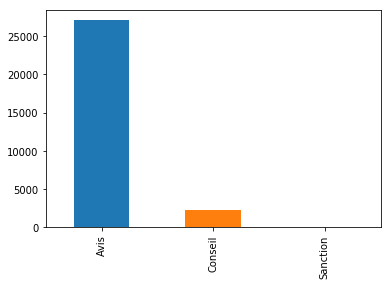

In [13]:
df.Type.value_counts().plot(kind="bar")

#print()
#print(df.Administration.value_counts())

### Distribution of the types of senses 
* TODO: Distribution of motivations ...

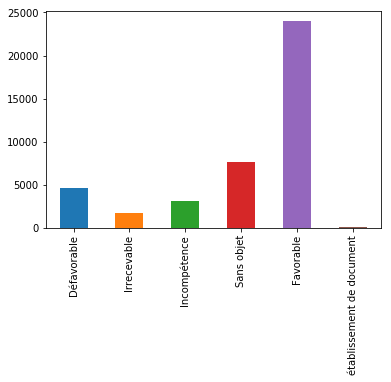

In [14]:
# Nasty way of doing this but it gets messy with get_dummies and co in Pandas
# do not know how to do it in a Pandas-ic way
dico_senses = defaultdict(int)
for v in df.only_senses.dropna().values:
    for vv in v:
        dico_senses[vv]+=1
del dico_senses[""]
foo = pd.Series(dico_senses).plot(kind="bar")


### Distribution of the types of motivations 
* TODO: Distribution of motivations ...

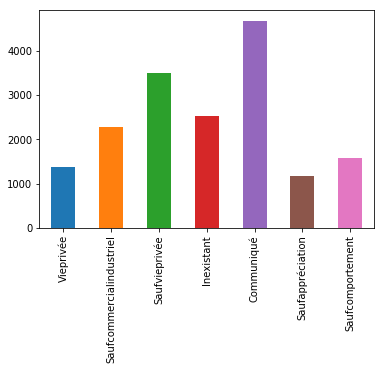

In [15]:
dico_motivations = defaultdict(int)
for v in df.only_motivations.dropna().values:
    for vv in v:
        new_key = re.sub(r"\s+", "", vv.strip())
        dico_motivations[new_key]+=1
# del dico_motivations[""]
# pd.DataFrame(dico_motivations, index=[0]).plot(kind="bar")
dico_motivations_filtered = dict(list(filter(lambda x: x[1] > 1000, dico_motivations.items())))
pd.Series(dico_motivations_filtered).plot(kind="bar")

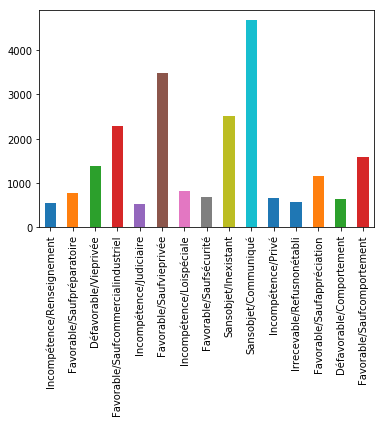

In [16]:
df["both_senses_motivs"]
sens_motivs = defaultdict(int)
for v in df["both_senses_motivs"].dropna().values:
    for vv in v:
        new_key = re.sub(r"\s+", "", vv.strip())
        sens_motivs[new_key] += 1

sens_motivs_filtered = dict(list(filter(lambda x: x[1] > 500 and "/" in x[0], sens_motivs.items())))
pd.Series(sens_motivs_filtered).plot(kind="bar")

### Distribution of petitions by year

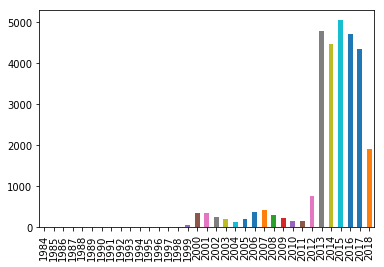

In [17]:
#df.Année.value_counts().plot(kind="bar")
df.Année.value_counts().sort_index().plot(kind="bar")


### All petitions per administration
* Most of them only receive one or two petitions from CADA
  

count    11086.000000
mean         2.643424
std         13.354510
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        972.000000
Name: Administration, dtype: float64


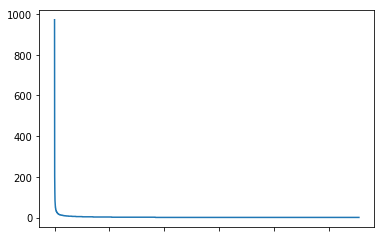

In [18]:
admin = df.Administration.dropna().value_counts()
admin.plot()
# Most administrations requested by the CADA receive only one or two petitions
print(admin.describe())

### Administrations with more than 50 CADA petitions
Those administrations that receive more than 50 petitions from CADA

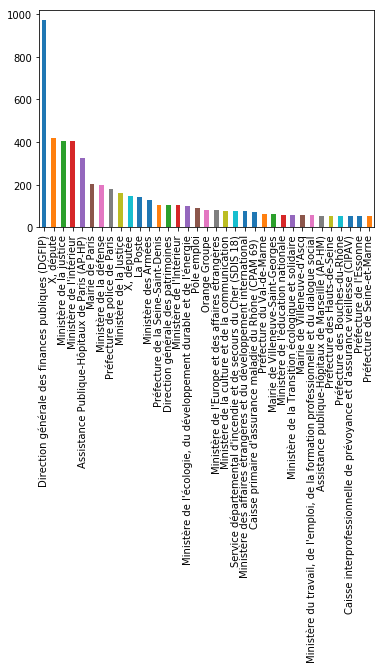

In [19]:
admin[admin >= 50].plot(kind="bar")
sup_50 = admin[admin >= 50].index

,Défavorable,Irrecevable,Incompétence,Sans objet,Favorable,établissement de document
1984,2,1.0,1.0,0.0,0.0,0.0
1985,1,0.0,0.0,0.0,0.0,0.0
1986,1,0.0,0.0,1.0,0.0,0.0
1987,2,0.0,0.0,0.0,1.0,0.0
1988,2,0.0,0.0,1.0,0.0,0.0
1989,1,0.0,0.0,0.0,1.0,0.0
1990,1,0.0,0.0,0.0,4.0,0.0
1991,5,0.0,1.0,0.0,2.0,0.0
1992,3,0.0,3.0,0.0,10.0,0.0
1993,5,0.0,2.0,0.0,10.0,0.0


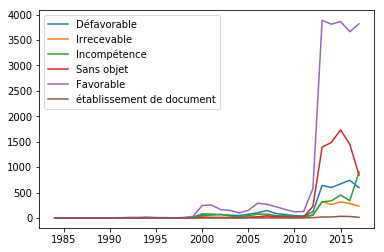

In [46]:
df_b2018 = df[df.Année < 2018]
dico_annee_senses = defaultdict(lambda: defaultdict(int))
for year, senses in df_b2018[["Année", "only_senses"]].dropna().values:
    for s in [s for s in senses if s]:
        dico_annee_senses[year][s] += 1
dico_annee_senses_df = pd.DataFrame.from_dict(dico_annee_senses, orient="index").fillna(0)
dico_annee_senses_df.dropna().plot()


### Distribution of type of sense by year

{'Défavorable': 358,
 'Favorable': 2924,
 'Incompétence': 201,
 'Irrecevable': 207,
 'Sans objet': 1087}

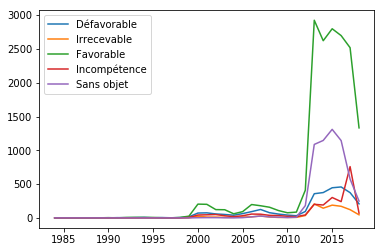

In [32]:
df_sup_50 = df.loc[df["Administration"].isin(sup_50)]
# gp50 = df_sup_50.groupby(["Administration", "Sens_reduced"])
# gp50.plot(kind="bar")

annee_sens = defaultdict(dict)
types_sens = list(filter(None, df.Sens_reduced.dropna().unique().tolist()))
gp2 = df.groupby(["Année", "Sens_reduced"])
gp2.groups
for name, gp in gp2:
#     print(name)
#     print(gp)
    if name[1]:
        annee_sens[name[0]][name[1]] = len(gp)
df2 = pd.DataFrame.from_dict(annee_sens, orient="index").fillna(0)
df2.dropna().plot()
# df2
annee_sens[2013]


### Treatment delay

The intuition is that given that there are two dates on the first sentence of the Avis. The first one is the date of the
séance and the second one is the date of the reception of the dossier at the CADA. Usually, the first date is the same
as the one in the column séance. The second date is the date of the demande. So it should be as easy as substracting the latter from the former. 
 
But not all avis have two dates, a lot have only one and it can be either the date of the seance of the resolution or the date the demande was received. The date of the seance is intuitively always preceded by the phrase "dans sa seance du". So the other date should be always the date of the demande's reception.

In [47]:
# Split lines of the avis
df["Avis_splitted"] = df["Avis"].dropna().apply(lambda x: x.split("\n"))

In [48]:
def get_avis_regex(text):
    """
    Get the date of the reception of the avis. There are around 3000 avis that do not contain a reception date
    or are this naive approach is not able to extract said date (among ~40k, which is okish)
    """
    secretariat_regex = r"\sson secrétariat\sle\s([0-9][0-9]?\s\w{3,}\s[0-9]{,4})"
    par_lettre_regex = r"\slettre\sdu\s([0-9][0-9]?\s\w{3,}\s[0-9]{,4})"
    match = re.findall(par_lettre_regex, text[0])
    match2 = re.findall(secretariat_regex, text[0])
    if match or match2:
        return dateparser.parse(match[0] if match else match2[0], languages=["fr"])
    else:
        return None

In [49]:
# giant_regex = r'(séance\sdu\s[0-9][0-9]?\s\w+\s[0-9]{,4})|([0-9][0-9]?\s\w+\s[0-9]{4})'
df["Avis_splitted"] = df["Avis"].dropna().apply(lambda x: x.split("\n"))

df["Avis_dates"] = df.loc[df["Type"]=="Avis"]["Avis_splitted"].dropna().apply(lambda x: get_avis_regex(x))

In [50]:
#  Transform seance date
df["Séance_date"] = df["Séance"].dropna().apply(lambda x: dateparser.parse(x, languages=["fr"]))

In [51]:
delta_dates = (df.Séance_date - df.Avis_dates).apply(lambda x: x.days)

In [52]:
delta_dates[delta_dates < 0] = np.NaN
df["delta_dates"] = delta_dates

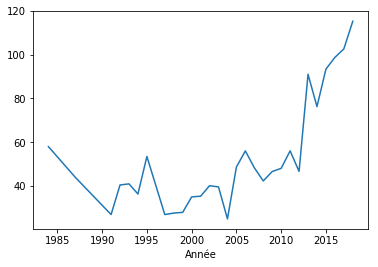

In [53]:
df.dropna().groupby(["Année", "delta_dates"], as_index=False).mean().groupby("Année")["delta_dates"].mean().plot()